In [7]:
# Import dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
from config import hostpass

In [8]:
# Connect to server for data pull
engine = create_engine(f'postgresql://{hostpass}@localhost:5432/SQL_homework')
connection = engine.connect()

In [9]:
# Pull salary table from server
salary_df = pd.read_sql('Select * FROM salaries', connection)
salary_df

,employee_number,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


Text(0.5, 1.0, 'Distribution of Salaries')

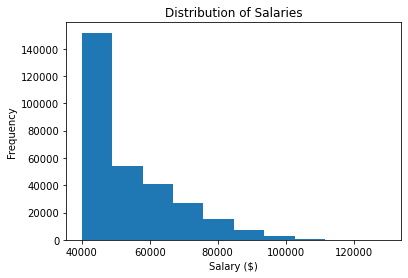

In [10]:
# Create a histogram to visualize the most common salary ranges for employees.
ax1 = salary_df.salary.plot.hist()
ax1.set_xlabel('Salary ($)')
ax1.set_title('Distribution of Salaries')

In [12]:
# Create a bar chart of average salary by title
# Read in employees table
employee_df = pd.read_sql('SELECT * FROM employees', connection)

# Merge with salaries
merge_df = pd.merge(salary_df, employee_df, on = 'employee_number')

# Read in titles table
title_df = pd.read_sql('SELECT * FROM titles', connection)

#Merge into central table
merge_df = pd.merge(merge_df, title_df, on = 'title_id')
merge_df = merge_df.dropna()

# Create mean value grouped on 'title'
title_grouped_df = merge_df.groupby('title').mean()
title_grouped_df.reset_index(inplace = True)

Text(0.5, 0, '')

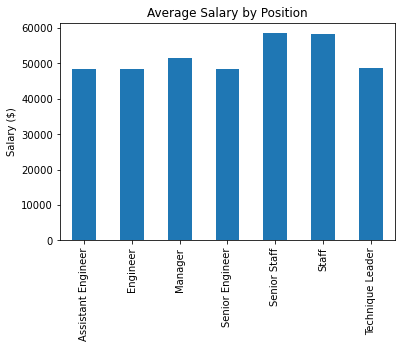

In [15]:
# Plot Data
ax2 = title_grouped_df.plot.bar('title', 'salary', legend = False)
ax2.set_title('Average Salary by Position')
ax2.set_ylabel('Salary ($)')
ax2.set_xlabel('')